In [4]:
import csv
import pandas as pd
import glob
import html
import re
from tqdm import tqdm_notebook as tqdm
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

### now off to alter the review text (html.unescape) and add it to a dataframe

In [8]:
df = pd.read_csv('final_csv/merged_christmas.csv', sep='\t', converters={'review_text':html.unescape, 'reviewer_name':html.unescape, 'summary':html.unescape})

df=df[~df['rating'].isin(['rating'])]
# df=df[~df['rating'].isin(['1','2','3','4','5','rating'])]
df

,asin,title,reviewer_id,reviewer_name,review_text,rating,summary,review_date,total_votes,helpful_votes,unhelpful_votes
0,6302595916,A Christmas Carol (Colorized) [VHS],A3HS5U2UUSQP0N,""" Anti Microchip "" ""Jesus Christ can ...",With all the newer versions of this movie from...,4.0,A classic christmas film,2010-11-08,4,1,3
1,6302595916,A Christmas Carol (Colorized) [VHS],A1166FE81ADOUR,50s sci-fi Fan,"The most remarkable thing about ""A Christmas C...",5.0,A Christmas Phenomenon,2010-12-20,0,0,0
2,6302595916,A Christmas Carol (Colorized) [VHS],AVBYL0BIAZ8IB,Aaron J. Palmer,"This version of ""A Christmas Carol"" is one of ...",5.0,Classic,2007-03-09,1,1,0
3,6302595916,A Christmas Carol (Colorized) [VHS],A2PS1KAU6MGELR,A Customer,"Alas, for Jacob Marley's ghost when he respond...",5.0,"""Business?!! MANKIND was my business!""",2001-07-04,10,8,2
4,6302595916,A Christmas Carol (Colorized) [VHS],A3QDI33E8BCM7,Adam,I started watching this movie every Christmas ...,5.0,A Christmas Carol,2010-12-11,0,0,0
5,6302595916,A Christmas Carol (Colorized) [VHS],A1ESJN9F9JUVIH,Adam Love,This 2-disc restored 1951 edition of the timel...,5.0,PRESENTED IN ORIGINAL 1.37:1 FORMAT,2010-03-10,3,3,0
6,6302595916,A Christmas Carol (Colorized) [VHS],A3MNPSG11YDA1M,Adopt a Pet,This is my absolute favorite version of A Chri...,5.0,Favorite version,2014-01-25,0,0,0
7,6302595916,A Christmas Carol (Colorized) [VHS],A3P01JK5ZY6DID,"A. Guyton ""eluraluna""",I know most folks just love Alastair Sim's Scr...,2.0,"Sorry, but I am a fan of Dickens' Scrooge... t...",2003-01-25,28,4,24
8,6302595916,A Christmas Carol (Colorized) [VHS],A2POXGAFBRSDI7,A Huge Fan of the Movie,This is the most heart wrenching and inspirati...,5.0,Fantastic,2002-12-04,5,5,0
9,6302595916,A Christmas Carol (Colorized) [VHS],A2V29IO9JQQF5P,A. Jones,A masterpiece of film making in every sense of...,5.0,"Don't Be A Scrooge, Buy This Gem",2011-01-19,1,1,0


### let's do some calculations

In [16]:


Christmas = []
not_Christmas = []
Christmas_in_text=[]
no_Christmas_in_text=[]
Christmas_in_text_1=[]
no_Christmas_in_text_1=[]

for index, row in tqdm(df.iterrows()):
    
    if re.match('[0-9]+-12-(2[5-7])', row['review_date']):
        Christmas.append(float(row['rating']))
        if "christmas" in row['review_text'].lower():
            Christmas_in_text.append(float(row['rating']))
        else:
            no_Christmas_in_text.append(float(row['rating']))
    else:
        not_Christmas.append(float(row['rating']))
        if "christmas" in row['review_text'].lower():
            Christmas_in_text_1.append(float(row['rating']))
        else:
            no_Christmas_in_text_1.append(float(row['rating']))
            
print("Christmas:", (sum(Christmas)/float(len(Christmas)))," vs not_Christmas:", (sum(not_Christmas) / float(len(not_Christmas))))
print("number of ratings per day: In Christmas: ", len(Christmas)/7," vs. Not in Christmas: ", len(not_Christmas)/358)

print(f_oneway(np.array(Christmas),np.array(not_Christmas)))
print("Christmas in text:", sum(Christmas_in_text)/len(Christmas_in_text), "vs no Christmas in text", sum(no_Christmas_in_text)/len(no_Christmas_in_text))
print("number of ratings:", len(Christmas_in_text),"vs.", len(no_Christmas_in_text))
print(f_oneway(np.array(Christmas_in_text),np.array(no_Christmas_in_text)))
print("Christmas in text:", sum(Christmas_in_text_1)/len(Christmas_in_text_1), "vs no Christmas in text", sum(no_Christmas_in_text_1)/len(no_Christmas_in_text_1))
print("number of ratings:", len(Christmas_in_text_1),"vs.", len(no_Christmas_in_text_1))
print(f_oneway(np.array(Christmas_in_text_1),np.array(no_Christmas_in_text_1)))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


Christmas: 4.358395013634593  vs not_Christmas: 4.357302559163457
number of ratings per day: In Christmas:  366.7142857142857  vs. Not in Christmas:  649.6536312849162
F_onewayResult(statistic=0.0020965287597590359, pvalue=0.96347936817706514)
Christmas in text: 4.372727272727273 vs no Christmas in text 4.357051555176821
number of ratings: 220 vs. 2347
F_onewayResult(statistic=0.033770040629062768, pvalue=0.8542113463868376)
Christmas in text: 4.59354247767346 vs no Christmas in text 4.3527818797681075
number of ratings: 4367 vs. 228209
F_onewayResult(statistic=172.00275554174738, pvalue=2.7907689434988795e-39)


# Very first attempts

### Assumpt Christmas time = 12-24 to 12-30 (X)

I take the week 12.24-12.30 in review dates as the "Christmas time", namely, the time when most reviewers actually watched the movies for Christmas. And by browsing the review texts on these days, I find that many reviewers did watch it for the festival.

Examples:

So I calculate the the rating differences based on this assumption:

**Christmas movies:**  
Christmas: 4.58 vs not_Christmas: 4.65  
number of ratings: 1283 8566  
F_onewayResult(statistic=6.6695623219982476, pvalue=0.009821624109377685)  

***For Comparison:***

**(Christmas movies rating's change per week around Christmas week in chart)**

**Non-Christmas movies:**  
Christmas: 4.37 vs not_Christmas: 4.36  
number of ratings: 6355 228788  
F_onewayResult(statistic=0.55247887357200631, pvalue=0.45730733574214155) 


**Hypothesis 1: People rate lower than usual in the Christmas days**

***Assumptive reasons:***
1. In some review texts, reviewers watched it with family and rated it lower because they thought it was not good for kids.
2. Some people might expect more from a Christmas movie when watching it on Christmas, and might be easier to feel disappointed and rated it lower.
3. Other seasonal factors?

***Examining H1:***

**Reviews with the keyword "Christmas" versus those withnot**  
xmas in text: 4.736686390532545 vs no xmas in text 4.413509060955519  
number of ratings: 676 607  
F_onewayResult(statistic=35.295181190594349, pvalue=3.6459838108910105e-09)  

**Hypothesis 1 - doubtful**

**Hypothesis 2 - Hypothesis 1 is not correct. There are people who review on these days didn't watch the movies on Christmas days. People who actually watched it for Christmas rated higher.**

***Examing H2:***
1. literatures
2. 
More researches on review texts:


## Christmas time = 12-25 to 12-27

### Christmas Movies
Christmas: 4.52  vs not_Christmas: 4.65
number of ratings per day: In Christmas:  86.42857142857143  vs. Not in Christmas:  25.821229050279328
F_onewayResult(statistic=12.188309436614393, pvalue=0.00048300654392550275)
Christmas in text: 4.6875 vs no Christmas in text 4.352159468438538
number of ratings: 304 vs. 301
F_onewayResult(statistic=14.907198350452308, pvalue=0.00012513153627282953)
Christmas in text: 4.769162210338681 vs no Christmas in text 4.542052144659378
number of ratings: 4488 vs. 4756
F_onewayResult(statistic=154.43289703768355, pvalue=3.5547569671607464e-35)

### Non Christmas Movies
Christmas: 4.36  vs not_Christmas: 4.36
number of ratings per day: In Christmas:  366.7142857142857  vs. Not in Christmas:  649.6536312849162
F_onewayResult(statistic=0.0020965287597590359, pvalue=0.96347936817706514)



In [1]:
# Ratings_in_2_months_around_Christmas = []

# for index, row in tqdm(df.iterrows()):

#     if re.match('([0-9]+-11-(2[6-9]|30))|([0-9]+-12-[0-9]+)|([0-9]+-01-(0[1-9]|1[0-9]|2[0-7]))',row['review_date']):
#         Ratings_in_2_months_around_Christmas.append([(float(row['rating'])), row['review_date']])



HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

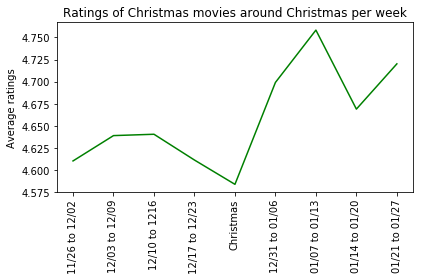

In [25]:
# "1217to1223" 
Wb1 = []
# "1210to1216"
Wb2 = []
# "1203to1209"
Wb3 = []
# "1126to1202"
Wb4 = []
Christmas = []
# "1231to0106"
Wa1 = []
# "0107to0113"
Wa2 = []
# "0114to0120"
Wa3 = []
# "0121to0127"
Wa4 =[]

for index, row in tqdm(df.iterrows()):
    
    if re.match('([0-9]+-11-(2[6-9]|30))|([0-9]+-12-(01|02))', row['review_date']):
        Wb4.append(float(row['rating']))
    elif re.match('[0-9]+-12-0[3-9]', row['review_date']):
        Wb3.append(float(row['rating']))
    elif re.match('[0-9]+-12-1[0-6]', row['review_date']):
        Wb2.append(float(row['rating']))
    elif re.match('[0-9]+-12-(1[7-9]|2[0-3])', row['review_date']):
        Wb1.append(float(row['rating']))
    elif re.match('[0-9]+-12-(2[4-9]|30)', row['review_date']):
        Christmas.append(float(row['rating']))
    elif re.match('([0-9]+-12-31)|([0-9]+-01-0[1-6])', row['review_date']):
        Wa1.append(float(row['rating']))
    elif re.match('[0-9]+-01-(0[7-9]|1[0-3])', row['review_date']):
        Wa2.append(float(row['rating']))
    elif re.match('[0-9]+-01-(1[4-9]|20)', row['review_date']):
        Wa3.append(float(row['rating']))
    elif re.match('[0-9]+-01-2[1-7]', row['review_date']):
        Wa4.append(float(row['rating']))

# x = np.arange(-4,5,1)
y = np.array([sum(Wb4)/len(Wb4),sum(Wb3)/len(Wb3),sum(Wb2)/len(Wb2),sum(Wb1)/len(Wb1),sum(Christmas)/len(Christmas),sum(Wa1)/len(Wa1),sum(Wa2)/len(Wa2),sum(Wa3)/len(Wa3),sum(Wa4)/len(Wa4)])

plt.plot(x,y,color='green')
plt.xticks(np.arange(-4,5,1),("11/26 to 12/02","12/03 to 12/09", "12/10 to 1216", "12/17 to 12/23", "Christmas", "12/31 to 01/06", "01/07 to 01/13", "01/14 to 01/20", "01/21 to 01/27" ), rotation='vertical')
# plt.xlabel('Weeks before and after Christmas')
plt.ylabel('Average ratings')
plt.title('Ratings of Christmas movies around Christmas per week')
plt.tight_layout()
plt.savefig('Ratings of Christmas movies around Christmas per week.png',format='png')

plt.show()

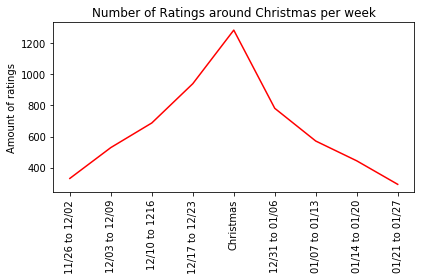

In [26]:
x1=np.arange(-4,5,1)
y1=np.array([len(Wb4),len(Wb3),len(Wb2),len(Wb1),len(Christmas),len(Wa1),len(Wa2),len(Wa3),len(Wa4)])
plt.plot(x1,y1,color='red')
plt.xticks(np.arange(-4,5,1),("11/26 to 12/02","12/03 to 12/09", "12/10 to 1216", "12/17 to 12/23", "Christmas", "12/31 to 01/06", "01/07 to 01/13", "01/14 to 01/20", "01/21 to 01/27" ),rotation='vertical')
# plt.xlabel('Weeks before and after Christmas')
plt.ylabel('Amount of ratings')
plt.title('Number of Ratings around Christmas per week')
plt.tight_layout()
plt.savefig('Number of Ratings around Christmas per week.png',format='png')

plt.show()